# Capstone project - HealthCare Fraud Detection : Random Forest Models

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,\
StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_roc_curve,roc_auc_score,f1_score
from sklearn.metrics import classification_report as cl_rep_skl
from yellowbrick.classifier import confusion_matrix, classification_report, ROCAUC
from yellowbrick.model_selection import CVScores
from cp_clean_helper import show_values
from LGR_helper import std_num_cols, rb_scale_cols, model_results, get_confusion_matrix
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)

### # Loading datasets, and looking at shapes:-

In [2]:
# Loading train-test 70:30 split (SMOTE and BorderlineSMOTE) datasets
# For these same columns have been drooped as done for the LGR model

trainX_SM = pd.read_csv("trainX_SM.csv",index_col=0)
trainY_SM = pd.read_csv("trainY_SM.csv",index_col=0)
testX_SM = pd.read_csv("testX_SM.csv",index_col=0)
testY_SM = pd.read_csv("testY_SM.csv",index_col=0)

trainX_BSM = pd.read_csv("trainX_BSM.csv",index_col=0)
trainY_BSM = pd.read_csv("trainY_BSM.csv",index_col=0)
testX_BSM = pd.read_csv("testX_BSM.csv",index_col=0)
testY_BSM = pd.read_csv("testY_BSM.csv",index_col=0)

# Looking at dataset shapes

print('\n')
print('Shape of SMOTE balanced trainX data :',trainX_SM.shape)
print('Shape of SMOTE balanced trainY data :',trainY_SM.shape)
print('Shape of SMOTE balanced testX data :',testX_SM.shape)
print('Shape of SMOTE balanced testY data :',testY_SM.shape)
print('Shape of Borderline SMOTE balanced trainX data :',trainX_BSM.shape)
print('Shape of Borderline SMOTE balanced trainY data :',trainY_BSM.shape)
print('Shape of Borderline SMOTE balanced testX data :',testX_BSM.shape)
print('Shape of Borderline SMOTE balanced testY data :',testY_BSM.shape, end='\n')
print('\n')
print("*"*60)

# Looking at class ratios

print('\n')
print('Class ratio - Fraud/Non-Fraud (trainY_SM) :',trainY_SM.value_counts(normalize=True)*100)
print('Class ratio - Fraud/Non-Fraud (testY_SM) :',testY_SM.value_counts(normalize=True)*100)
print('Class ratio - Fraud/Non-Fraud (trainY_BSM) :',trainY_BSM.value_counts(normalize=True)*100)
print('Class ratio - Fraud/Non-Fraud (testY_BSM) :',testY_BSM.value_counts(normalize=True)*100, end='\n')
print('\n')
print("*"*60)



Shape of SMOTE balanced trainX data : (483580, 44)
Shape of SMOTE balanced trainY data : (483580, 1)
Shape of SMOTE balanced testX data : (207250, 44)
Shape of SMOTE balanced testY data : (207250, 1)
Shape of Borderline SMOTE balanced trainX data : (483580, 44)
Shape of Borderline SMOTE balanced trainY data : (483580, 1)
Shape of Borderline SMOTE balanced testX data : (207250, 44)
Shape of Borderline SMOTE balanced testY data : (207250, 1)


************************************************************


Class ratio - Fraud/Non-Fraud (trainY_SM) : PotentialFraud
0                 50.0
1                 50.0
dtype: float64
Class ratio - Fraud/Non-Fraud (testY_SM) : PotentialFraud
0                 50.0
1                 50.0
dtype: float64
Class ratio - Fraud/Non-Fraud (trainY_BSM) : PotentialFraud
0                 50.0
1                 50.0
dtype: float64
Class ratio - Fraud/Non-Fraud (testY_BSM) : PotentialFraud
0                 50.0
1                 50.0
dtype: float64


*******

### # Standardizing the train/test features for balanced datasets:

In [3]:
# SMOTE balanced dataset

# std_num_cols(trainX_SM)
# std_num_cols(testX_SM)

# BorderlineSMOTE balanced dataset

# std_num_cols(trainX_BSM)
# std_num_cols(testX_BSM)

### Baseline Random Forest Model - Standardized

In [4]:
# SMOTE Balanced

# rf_std = RandomForestClassifier(random_state=0, oob_score=True)
# model_results(trainX_SM, trainY_SM, testX_SM, testY_SM, rf_std, show = True)

# Out of bag error:

# rf_std.oob_score_

In [5]:
# BorderlineSMOTE Balanced

# rf_std = RandomForestClassifier(random_state=0, oob_score=True)
# model_results(trainX_BSM, trainY_BSM, testX_BSM, testY_BSM, rf_std, show = True)

# Out of bag error:

# rf_std.oob_score_

### # Robust Scaling the train/test features for  balanced datasets:

In [6]:
# SMOTE balanced dataset

rb_scale_cols(trainX_SM)
rb_scale_cols(testX_SM)

# BorderlineSMOTE balanced dataset

rb_scale_cols(trainX_BSM)
rb_scale_cols(testX_BSM)

### Baseline Random Forest Model - Robust Scaled

In [7]:
# SMOTE Balanced

# rf_rb = RandomForestClassifier(random_state=0, oob_score=True)
# model_results(trainX_SM, trainY_SM, testX_SM, testY_SM, rf_rb,show = True)

# Out of bag error:

# rf_rb.oob_score_

In [8]:
# BorderlineSMOTE Balanced

rf_rb = RandomForestClassifier(random_state=0, oob_score=True)
model_results(trainX_BSM, trainY_BSM, testX_BSM, testY_BSM, rf_rb, show = True)

The Model Results for  RandomForestClassifier(oob_score=True, random_state=0)
************************************************************
Train Accuracy is equal to 1.000
Test Accuracy is equal to 0.740
The Precision score is 0.785
The Average Precision score is 0.688
The Recall score is 0.659
The F1 score is 0.717
The AUC/ROC score is 0.740
True-Positive: 68317.000
True-Negative: 84949.000
False-Positive: 18676.000
False-Negative: 35308.000
Correctly Classified: 153266.000
Incorrectly Classified: 53984.000


[0.99999793208983, 0.7395223160434258, 0.7853160599128666, 0.6592714113389626]

In [9]:
# Out of bag error:

rf_rb.oob_score_

0.7441726291409901

- Scaling and different upsampling types does not make much difference, so we will go with datasets with BorderlineSmote upsampling and preprocessed using robust scaler as the first base model.

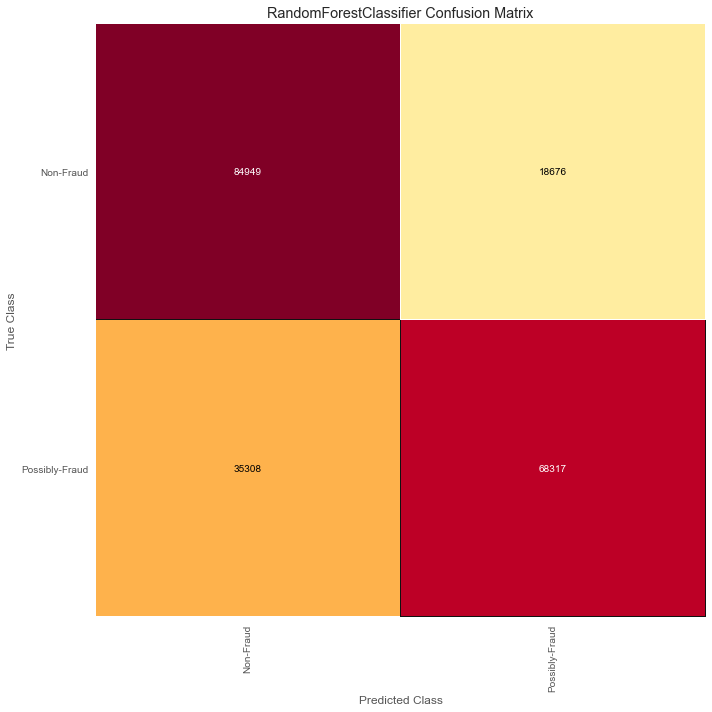

ConfusionMatrix(ax=<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=['Non-Fraud', 'Possibly-Fraud'],
                cmap=<matplotlib.colors.ListedColormap object at 0x000002210E5665B0>,
                estimator=RandomForestClassifier(oob_score=True,
                                                 random_state=0))

In [10]:
# Visualizing the confusion matrix with Yellowbricks (thres=0.5)

plt.figure(figsize = (10,10))
confusion_matrix(
    rf_rb,
    trainX_BSM, trainY_BSM, testX_BSM, testY_BSM,
    classes=['Non-Fraud', 'Possibly-Fraud'])

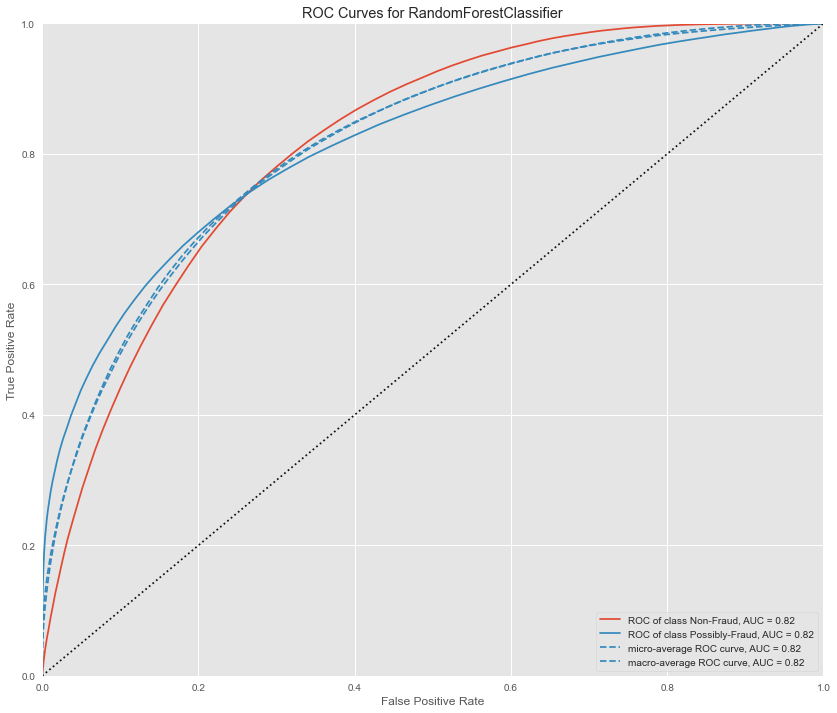

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [11]:
# Visualizing the AUC/ROC curve with Yellowbricks

plt.figure(figsize = (14,12))

visualizer = ROCAUC(rf_rb, classes=['Non-Fraud', 'Possibly-Fraud'])

visualizer.fit(trainX_BSM, trainY_BSM)        # Fit the training data to the visualizer
visualizer.score(testX_BSM, testY_BSM)        # Evaluate the model on the test data
visualizer.show()                           # Finalize and render the figure

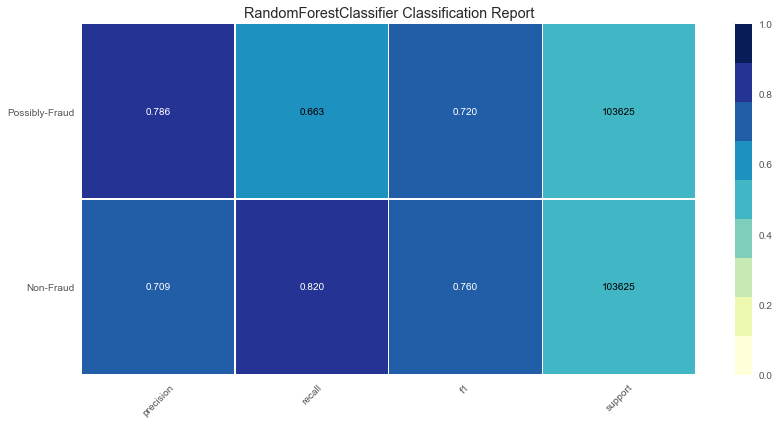

In [12]:
# Visualizing the classification report with Yellowbricks

plt.figure(figsize = (12,6))
visualizer = classification_report(
    rf_rb,
    trainX_SM, trainY_SM, testX_SM, testY_SM,
    classes=['Non-Fraud', 'Possibly-Fraud'],
    cmap='YlGnBu',
    support=True
)

### # Plotting scores for different number of trees in the random forest:

In [ ]:
trees_range = range(30, 500, 10)
train_error = []
test_error = []
oob_error = []
train_AUC = []
test_AUC = []
train_F1 = []
test_F1 = []

for n_trees in trees_range:
    rf = RandomForestClassifier(random_state=0, oob_score=True)
    rf.set_params(n_estimators=n_trees)
    rf.fit(trainX_BSM, trainY_BSM)
    train_error.append(1 - rf.score(trainX_BSM, trainY_BSM))
    test_error.append(1 - rf.score(testX_BSM, testY_BSM))
    oob_error.append(1 - rf.oob_score_)  
    train_AUC.append(roc_auc_score(trainY_BSM, rf.predict(trainX_BSM)))
    test_AUC.append(roc_auc_score(testY_BSM, rf.predict(testX_BSM)))
    train_F1.append(f1_score(trainY_BSM, rf.predict(trainX_BSM)))
    test_F1.append(f1_score(testY_BSM, rf.predict(testX_BSM)))

In [ ]:
plt.plot(trees_range, train_error, c='red', label='Training Error')
plt.plot(trees_range, test_error, c='blue', label='Test Error')
plt.plot(trees_range, oob_error, c='green', label='OOB Error')
plt.ylabel('Errors')
plt.xlabel('Number of trees')
plt.legend()
plt.show()

In [ ]:
plt.plot(trees_range, train_AUC, c='red', label='Training AUC Score')
plt.plot(trees_range, test_AUC, c='blue', label='Test AUC Score')
plt.ylabel('AUC Scores')
plt.xlabel('Number of trees')
plt.legend()
plt.show()

In [ ]:
plt.plot(trees_range, train_F1, c='red', label='Training F1 Score')
plt.plot(trees_range, test_F1, c='blue', label='Test F1 Score')
plt.ylabel('F1 Scores')
plt.xlabel('Number of trees')
plt.legend()
plt.show()